## 1. Load Data

In [1]:
import pandas as pd

df = pd.read_csv("hydrated_results.csv")
print(df.head())

       hashtag  video_date    likes    views  shares  comments
0  HumanRights  2025-10-22     1523     9104      34        50
1  HumanRights  2025-04-26   285400   982500   45000     29500
2  HumanRights  2025-09-19    94200   285600    2409      2554
3  HumanRights  2024-11-07   292500  1400000   10200       841
4  HumanRights  2025-01-01  1500000  7300000   30700      8122


In [4]:
print("Shape:", df.shape)
print(df["hashtag"].value_counts())

Shape: (1798, 6)
hashtag
HumanRights         166
ClimateCrisis       162
WomensRights        156
FreedomOfSpeech     149
MeToo               147
EndViolence         140
ActOnClimate        139
EqualityNow         135
FridaysForFuture    134
RefugeesWelcome     130
StandWithUkraine    130
IranProtests        127
SudanCrisis          83
Name: count, dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hashtag     1798 non-null   object
 1   video_date  1798 non-null   object
 2   likes       1798 non-null   int64 
 3   views       1798 non-null   int64 
 4   shares      1798 non-null   int64 
 5   comments    1798 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 84.4+ KB


## Missing Values Check

In [8]:
df.isna().sum()

hashtag       0
video_date    0
likes         0
views         0
shares        0
comments      0
dtype: int64

## Preliminary Analysis

In [9]:
hashtag_summary = (
    df.groupby("hashtag")[["likes","views","shares","comments"]]
      .mean()
      .sort_values("views", ascending=False)
)

hashtag_summary

,likes,views,shares,comments
hashtag,,,,
MeToo,253343.380952,2.589000e+06,16828.537415,2619.591837
FreedomOfSpeech,208004.288591,1.869530e+06,17980.630872,4972.026846
StandWithUkraine,143857.853846,1.367861e+06,4364.230769,3954.192308
WomensRights,245813.096154,1.349218e+06,12971.115385,2610.955128
SudanCrisis,105094.927711,1.339619e+06,9344.951807,2508.506024
EndViolence,131377.542857,9.896988e+05,3758.285714,1004.985714
IranProtests,57616.811024,9.174802e+05,3744.330709,2281.149606
HumanRights,158420.240964,9.133713e+05,7950.349398,2550.542169
ClimateCrisis,135988.845679,8.731685e+05,5985.432099,1313.154321


## Visualize Hashtag Usage Over Time

In [17]:
df["video_date"] = pd.to_datetime(df["video_date"], errors="coerce")

df = df[df["video_date"] >= "2000-01-01"]   # or a stricter cutoff if needed

usage_over_time = (
    df.groupby([df["video_date"].dt.to_period("M"), "hashtag"])
      .size()
      .reset_index(name="count")
)

usage_over_time.head()

,video_date,hashtag,count
0,2020-03,MeToo,1
1,2020-05,MeToo,1
2,2020-06,EqualityNow,1
3,2020-06,FridaysForFuture,1
4,2020-07,ActOnClimate,1


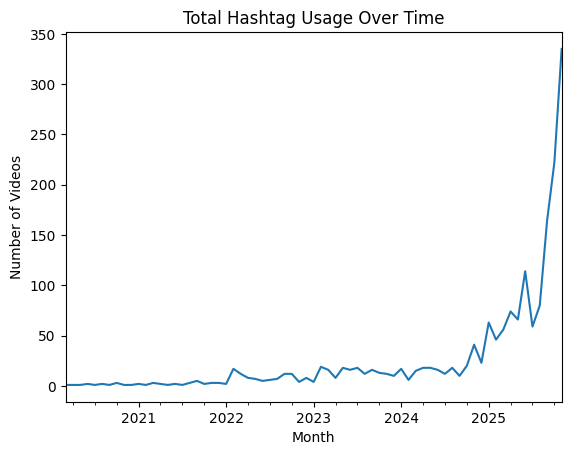

In [18]:
import matplotlib.pyplot as plt

# Plot usage trend for all hashtags combined (counts over time)
monthly_totals = usage_over_time.groupby("video_date")["count"].sum()

plt.figure()
monthly_totals.plot()
plt.xlabel("Month")
plt.ylabel("Number of Videos")
plt.title("Total Hashtag Usage Over Time")
plt.show()


## Engagement Trend Visualization

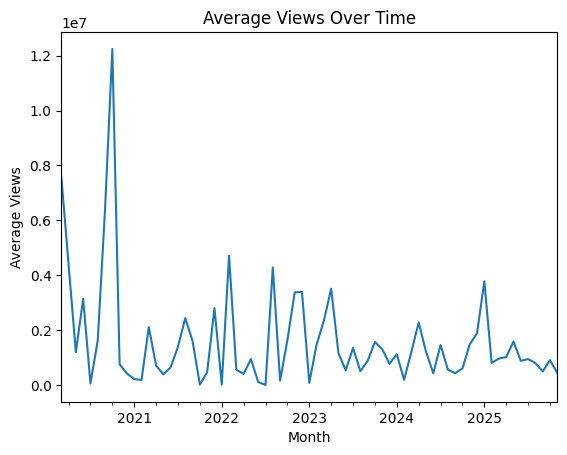

In [20]:
monthly_avg_views = (
    df.groupby(df["video_date"].dt.to_period("M"))["views"]
      .mean()
)

plt.figure()
monthly_avg_views.plot()
plt.xlabel("Month")
plt.ylabel("Average Views")
plt.title("Average Views Over Time")
plt.show()

## Compare Engagement Between Top 10 Hashtags

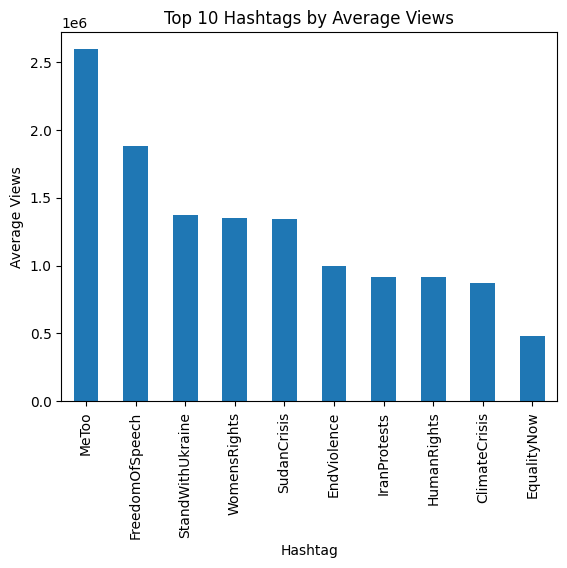

In [21]:
top10 = (
    df.groupby("hashtag")["views"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure()
top10.plot(kind="bar")
plt.xlabel("Hashtag")
plt.ylabel("Average Views")
plt.title("Top 10 Hashtags by Average Views")
plt.show()